In [32]:
import pandas as pd
import numpy as np
file = 'fighterdata.txt'
df = pd.read_csv(file, delimiter='\t', encoding='latin-1').dropna(subset=['Result', 'Date'])
df['Date']=pd.to_datetime(df['Date'])
df['MethodClean'] = df['MethodClean'].astype('category')
df['IDMerge'] = df['FID'] + df['OID']
df['Stoppage'] = [1 if x in ['KO', 'Submission'] else 0 for x in df['MethodClean']]
df['Decision'] = [1 if x =='Decision' else 0 for x in df['MethodClean']]
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592064 entries, 0 to 598292
Data columns (total 24 columns):
FID              592064 non-null int64
FighterID        592064 non-null object
Fighter          592064 non-null object
Birthdate        591333 non-null object
Height           591333 non-null float64
Weight           592039 non-null float64
Result           592064 non-null object
OID              591875 non-null float64
OpponentID       591875 non-null object
Opponent         591875 non-null object
Method           586509 non-null object
EventID          591144 non-null object
Event            591875 non-null object
Date             592064 non-null datetime64[ns]
Round            591875 non-null float64
Time             571939 non-null object
Referee          261028 non-null object
MethodClean      586487 non-null category
TotalTime        255491 non-null float64
AdjustedRound    255491 non-null float64
AdjustedTime     255491 non-null object
IDMerge          591875 non-null f

In [33]:
refdf = df[['Referee', 'EventID', 'Event', 'IDMerge', 'Date', 'Round', 'Time', 'MethodClean', 'TotalTime', 'Stoppage', 'Decision']].dropna().drop_duplicates()
#refdf['Stoppage'] = [1 if x in ['KO', 'Submission'] else 0 for x in refdf['MethodClean']]
#refdf['Decision'] = [1 if x =='Decision' else 0 for x in refdf['MethodClean']]
print(refdf.head())

             Referee                                   EventID  \
0          Herb Dean                 UFC-61-Bitter-Rivals-3910   
8   Akira Okabayashi  Pride-FC-Pride-Grand-Prix-2000-Finals-55   
9      John McCarthy             UFC-Ultimate-Ultimate-1996-19   
10     John McCarthy               UFC-9-Motor-City-Madness-16   
11     John McCarthy                 UFC-8-David-vs-Goliath-15   

                                       Event  IDMerge       Date  Round  \
0                     UFC 61 - Bitter Rivals    162.0 2006-07-08    1.0   
8   Pride FC - Pride Grand Prix 2000: Finals      9.0 2000-05-01    1.0   
9               UFC - Ultimate Ultimate 1996    141.0 1996-12-07    1.0   
10                UFC 9 - Motor City Madness     56.0 1996-05-17    1.0   
11                 UFC 8 - David vs. Goliath     47.0 1996-02-16    1.0   

     Time MethodClean  TotalTime  Stoppage  Decision  
0   01:18          KO       1.30         1         0  
8   09:43          KO       9.72         1

In [34]:
ref_summary = pd.pivot_table(refdf, index='Referee', values=['TotalTime', 'Stoppage', 'Decision'], aggfunc=[len, np.mean, np.sum])
ref_summary = ref_summary.loc[:, [('len', 'Decision'), ('sum','Stoppage'), ('sum','Decision'), ('mean','TotalTime')]]
ref_summary.columns = ('Fights', 'Stoppages', 'Decisions', 'AvgTime')
ref_summary['StoppageRate'] = ref_summary['Stoppages'] / ref_summary['Fights']
print(ref_summary.head())

                  Fights  Stoppages  Decisions   AvgTime  StoppageRate
Referee                                                               
AJ Aski                1          1          0  3.770000      1.000000
AJ Jeffery            34         30          4  4.605882      0.882353
AJ Jeffrey             3          3          0  0.786667      1.000000
Aaron Brounstein      13         10          3  5.554615      0.769231
Aaron Cota             4          4          0  3.917500      1.000000


In [40]:
df['Month'] = df['Date'].dt.strftime('%Y-%m')
df['Year'] = df['Date'].dt.strftime('%Y')
finish_history = pd.pivot_table(df, index='Year', values=['TotalTime', 'Stoppage', 'Decision'], aggfunc=[len, np.mean, np.sum])
finish_history = finish_history.loc[:, [('len', 'Decision'), ('sum','Stoppage'), ('sum','Decision'), ('mean','TotalTime')]]
finish_history.columns = ('Fights', 'Stoppages', 'Decisions', 'AvgTime')
finish_history = finish_history.dropna()
finish_history['StoppageRate'] = finish_history['Stoppages'] / finish_history['Fights']
print(finish_history)

      Fights  Stoppages  Decisions   AvgTime  StoppageRate
Year                                                      
1993     133        111         22  3.711786      0.834586
1994     291        247         40  4.867000      0.848797
1995     781        651         81  6.066429      0.833547
1996    1440       1113        215  8.312474      0.772917
1997    2075       1538        352  6.692846      0.741205
1998    2894       2153        522  9.284031      0.743953
1999    4455       3317        860  7.941292      0.744557
2000    5446       4020       1153  8.472071      0.738156
2001    6608       4892       1355  6.859089      0.740315
2002    8386       6139       1889  8.162857      0.732053
2003   11783       8888       2464  8.374203      0.754307
2004   12765       9591       2801  7.516028      0.751351
2005   15426      12084       3034  6.716321      0.783353
2006   23013      18047       4216  6.603936      0.784209
2007   28695      22676       5148  6.434942      0.7902

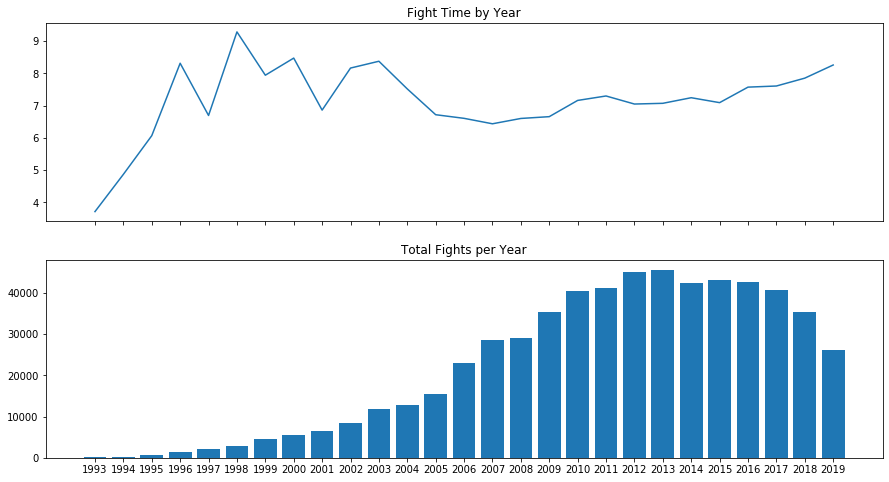

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.axes([1993, 1995, 2000, 2005, 2010, 2015, 2019])
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,8))
ax[0].plot(finish_history.AvgTime)
ax[0].title.set_text('Fight Time by Year')

ax[1].bar(finish_history.index, finish_history.Fights)
ax[1].title.set_text('Total Fights per Year')

#plt.tight_layout()
plt.show()

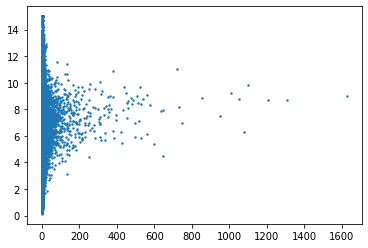

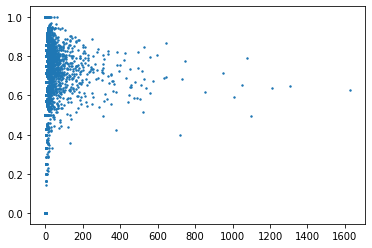

In [27]:
plt.scatter(ref_summary['Fights'], ref_summary['AvgTime'], s=2)
plt.show()
plt.scatter(ref_summary['Fights'], ref_summary['StoppageRate'], s=2)
plt.show()

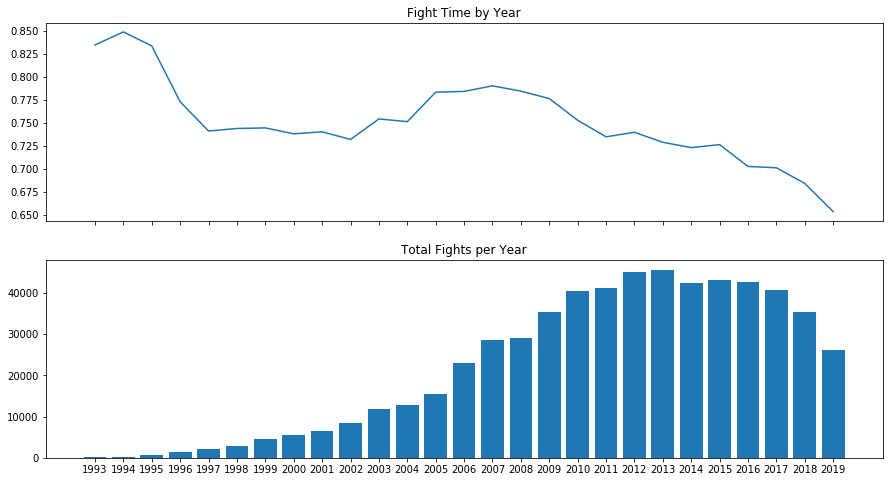

In [41]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,8))
ax[0].plot(finish_history.StoppageRate)
ax[0].title.set_text('Stoppage Rate by Year')

ax[1].bar(finish_history.index, finish_history.Fights)
ax[1].title.set_text('Total Fights per Year')

#plt.tight_layout()
plt.show()